In [3]:
#Kmer clustering


import pandas as pd
import numpy as np

In [4]:
genome='ACTTAGACCGGTTATACCCACAATATACCAATTTGGCCCTTAAAAGGTTAGGATACATAGGATACATAGGATACATAGATTACATAGATTACATAGGGACATTAGGAAAATACCAGGATATATACAGTAACGTACATGACAGATCAGTAGCATGGATC'

In [5]:
def de_bruijn_ize(st, k):
    """ Return a list holding, for each k-mer, its left
        k-1-mer and its right k-1-mer in a pair """
    edges = []
    nodes = set()
    for i in range(len(st) - k + 1):
        edges.append((st[i:i+k-1], st[i+1:i+k]))
        nodes.add(st[i:i+k-1])
        nodes.add(st[i+1:i+k])
    return nodes, edges

In [6]:
nodes, edges = de_bruijn_ize(genome, 8)

In [7]:
lines=np.array(list(nodes))

In [18]:
# function to convert a DNA sequence string to a numpy array
# converts to lower case, changes any non 'acgt' characters to 'n'
#https://www.kaggle.com/thomasnelson/working-with-dna-sequence-data-for-ml


import numpy as np
import re
def string_to_array(my_string):
    my_string = my_string.lower()
    my_string = re.sub('[^acgt]', 'z', my_string)
    my_array = np.array(list(my_string))
    return my_array

# create a label encoder with 'acgtn' alphabet
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a','c','g','t','z']))

def ordinal_encoder(my_array):
    integer_encoded = label_encoder.transform(my_array)
    float_encoded = integer_encoded.astype(float)
    float_encoded[float_encoded == 0] = 0.25 # A
    float_encoded[float_encoded == 1] = 0.50 # C
    float_encoded[float_encoded == 2] = 0.75 # G
    float_encoded[float_encoded == 3] = 1.00 # T
    float_encoded[float_encoded == 4] = 0.00 # anything else, z
    return float_encoded

X=[ordinal_encoder(string_to_array(i)) for i in lines]
X=np.array(X)

In [20]:
#PCA for Kmeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [21]:
#Figuring out Optimal number of clusters

def kmeanscost(K):
    kmeans = KMeans(n_clusters=K, random_state=0).fit(X)
    c=0
    m=X.shape[0]
    for i in range(0,m):
        c = c+np.dot((X[i,:]-kmeans.cluster_centers_[kmeans.labels_[i]]),((X[i,:]-kmeans.cluster_centers_[kmeans.labels_[i]])))
    cost = (1/float(m))*c 
    return (cost)

#Just trying for 10 clusters. Adjust to determine optimal number of clusters.
max_clusters=10
costs = []
for i in range(1,max_clusters+1):
    costs.append(kmeanscost(i))

In [22]:
#Kmeans
kmeans = KMeans(n_clusters=30, random_state=0, ).fit(principalComponents)

y_kmeans=kmeans.predict(principalComponents)

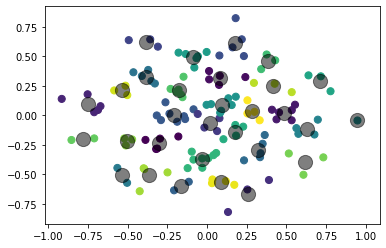

In [23]:
import matplotlib.pyplot as plt
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [24]:
#Nearest neighbors

from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(principalComponents)

In [25]:
distances, indices = nbrs.kneighbors(principalComponents)

In [26]:
indices

array([[  0,  52,  67],
       [  1, 107,  78],
       [  2,  30,  59],
       [  3,  67,  28],
       [  4,  54, 102],
       [  5,  24,  26],
       [  6, 108,  82],
       [  7,  52,  92],
       [  8, 111, 120],
       [  9,  10, 115],
       [ 10,  41,   9],
       [ 11, 123,  91],
       [ 12, 103,  45],
       [ 13,  73, 104],
       [ 14,  59,  30],
       [ 15, 106, 122],
       [ 16, 124,  43],
       [ 17, 110, 105],
       [ 18,  20,  65],
       [ 19, 112,  84],
       [ 20,  18,  65],
       [ 21, 118,  69],
       [ 22,  72,  27],
       [ 23,  28,   3],
       [ 24,   5,  26],
       [ 25,  99,  50],
       [ 26,  24,   5],
       [ 27,  76,  90],
       [ 28,  23,   3],
       [ 29,  61,  39],
       [ 30,  59,   2],
       [ 31,  40, 109],
       [ 32,  33,  63],
       [ 33,  32,  85],
       [ 34,  75,  29],
       [ 35, 119,  62],
       [ 36, 117, 118],
       [ 37,  68,  10],
       [ 38,  58, 101],
       [ 39,  61,  29],
       [ 40, 109,  31],
       [ 41,  53